In [18]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
from functools import partial
from scipy import special

# Define maximum number of iterations
MAX_ITER = 100

# Define range of complex numbers
RE_START = -2
RE_END = 1
IM_START = -1
IM_END = 1

# Compute Mandelbrot set as f_c(z) = z^2 + c while z is in 
# range [-2, 2] and n below the maximum number of iterations
def mandelbrot(c, max_iter):
    z = n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

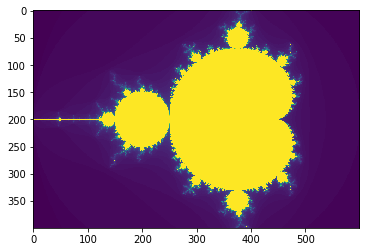

In [19]:
# Compute number of iterations possible in Mandelbrot calculation for 
# complex numbers in range [RE_START + IM_START * i, RE_END + IM_END * i]
image = np.zeros((400, 600))
for x, y in np.ndindex(image.shape):
    c = complex(RE_START + (y / image.shape[1]) * (RE_END - RE_START),
                    IM_START + (x / image.shape[0]) * (IM_END - IM_START))
    image[x,y] = mandelbrot(c, 100)
    
plt.imshow(image)
plt.show()

In [3]:
# Take s Monte Carlo samples from the Mandelbrot set
def monte_carlo_integration(i, s):
    samples = np.random.random((s,2))
    samples[:,0] = samples[:,0] * (RE_END - RE_START) + RE_START
    samples[:,1] = samples[:,1] * (IM_END - IM_START) + IM_START

    n = np.vectorize(mandelbrot)(samples.view(dtype=np.complex128), i)
    return (n == i).sum() / s * (RE_END - RE_START) * (IM_END - IM_START)

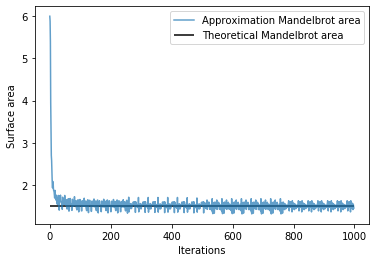

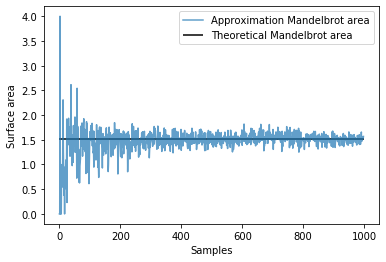

In [10]:
samples = list(range(1,1000))
iterations = list(range(1,1000))

pool = mp.Pool(mp.cpu_count())

areas = list(pool.starmap(monte_carlo_integration, zip(iterations, [samples[-1]]*len(iterations))))
plt.plot(areas, label = "Approximation Mandelbrot area", alpha = 0.7)
plt.hlines(1.506484, 0, iterations[-1], label = "Theoretical Mandelbrot area")
plt.xlabel("Iterations")
plt.ylabel("Surface area")
plt.legend()
# plt.savefig("Convergence_iterations.png", dpi=500)
plt.show()
plt.clf()

areas = list(pool.starmap(monte_carlo_integration, zip([iterations[-1]]*len(samples), samples)))
plt.plot(areas, label = "Approximation Mandelbrot area", alpha = 0.7)
plt.hlines(1.506484, 0, samples[-1], label = "Theoretical Mandelbrot area")
plt.xlabel("Samples")
plt.ylabel("Surface area")
# plt.savefig("Convergence_samples", dpi=500)
plt.legend()
plt.show()
plt.clf()

pool.close()

## Variance Reduction

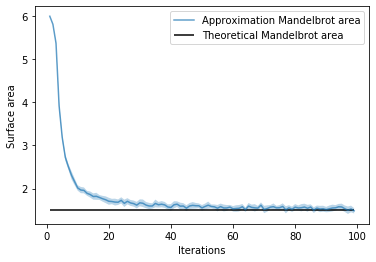

<Figure size 432x288 with 0 Axes>

In [64]:
iterations = list(range(1,100))
samples = list(range(1,100))

pool = mp.Pool(mp.cpu_count())

all_areas = []
for i in range(100):
    areas = list(pool.starmap(monte_carlo_integration, zip(iterations, [samples[-1]]*len(iterations))))
    all_areas.append(areas)

mean = np.mean(all_areas, axis=0)
variance = np.var(all_areas, axis=0)

plt.plot(iterations, mean, label = "Approximation Mandelbrot area", alpha = 0.7)
plt.hlines(1.506484, 1, len(iterations), label = "Theoretical Mandelbrot area")
plt.xlabel("Iterations")
plt.ylabel("Surface area")
plt.fill_between(iterations, mean - variance, mean + variance, alpha = 0.3)
plt.legend()
# plt.savefig("Convergence_iterations_variance.png", dpi=500)
plt.show()
plt.clf()

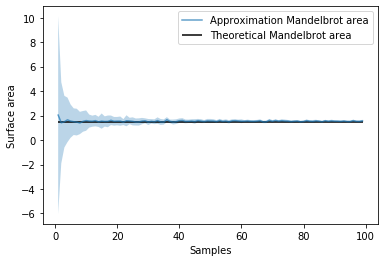

<Figure size 432x288 with 0 Axes>

In [73]:
iterations = list(range(1,100))
samples = list(range(1,100))

pool = mp.Pool(mp.cpu_count())

all_areas = []
for i in range(100):
    areas = list(pool.starmap(monte_carlo_integration, zip([iterations[-1]]*len(samples), samples)))
    all_areas.append(areas)

mean = np.mean(all_areas, axis=0)
variance = np.var(all_areas, axis=0)

plt.plot(samples, mean, label = "Approximation Mandelbrot area", alpha = 0.7)
plt.hlines(1.506484, 1, len(samples), label = "Theoretical Mandelbrot area")
plt.xlabel("Samples")
plt.ylabel("Surface area")
plt.fill_between(samples, mean - variance, mean + variance, alpha = 0.3)
# plt.savefig("Convergence_samples_variance", dpi=500)
plt.legend()
plt.show()
plt.clf()

pool.close()

## Latin Hypercube Sampling

In [6]:
def latin_hypercube_sampling(n_samples, n_dimensions=2):
    samples = np.random.random((n_samples, n_dimensions))
    perms = np.array([np.random.permutation(range(n_samples)) for _ in range(n_dimensions)]).T
    return (samples + perms) / n_samples

In [7]:
def monte_carlo_integration_lhs(i, s):
    samples = latin_hypercube_sampling(s,2)
    samples[:,0] = samples[:,0] * (RE_END - RE_START) + RE_START
    samples[:,1] = samples[:,1] * (IM_END - IM_START) + IM_START

    n = np.vectorize(mandelbrot)(samples.view(dtype=np.complex128), i)
    return (n == i).sum() / s * (RE_END - RE_START) * (IM_END - IM_START)

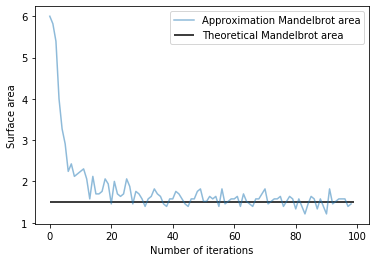

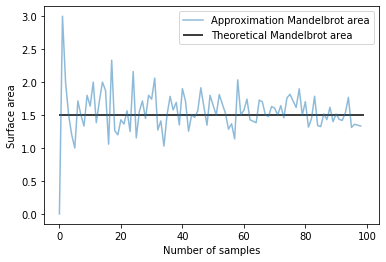

In [14]:
samples = list(range(1,100))
areas = []
iterations = list(range(1,100))

pool = mp.Pool(mp.cpu_count())

areas = list(pool.starmap(monte_carlo_integration_lhs, zip(iterations, [samples[-1]]*len(iterations))))
plt.plot(areas, label = "Approximation Mandelbrot area", alpha = 0.5)
plt.hlines(1.506484, 0, iterations[-1], label = "Theoretical Mandelbrot area")
plt.xlabel("Number of iterations")
plt.ylabel("Surface area")
plt.legend()
plt.show()

areas = list(pool.starmap(monte_carlo_integration_lhs, zip([iterations[-1]]*len(samples), samples)))
plt.plot(areas, label = "Approximation Mandelbrot area", alpha = 0.5)
plt.hlines(1.506484, 0, samples[-1], label = "Theoretical Mandelbrot area")
plt.xlabel("Number of samples")
plt.ylabel("Surface area")
plt.legend()
plt.show()

pool.close()